In [1]:
import PIL.Image
import PIL
import sklearn
from sklearn.cluster import KMeans
import numpy as np
import skimage
from skimage.color import rgb2hsv, rgb2lab
import pandas as pd

In [22]:
def display_map(im : PIL.Image.Image, 
                seg_mask : np.ndarray, start_at_zero=True):
    """ given an mask mapping pixels to labels, displays each submask 
        using the original image colors, with the complement displayed as white """
    arr_orig = np.array(im.convert('RGB'))
    vals = np.unique(seg_mask)
    for i in range(min(vals), max(vals)+1):
        if start_at_zero and i < 0:
            continue

        arr1 = arr_orig.copy()
        arr1[seg_mask != i] = 255
        display(f'{i=}')
        display(PIL.Image.fromarray(arr1))

def kmeans_segment(image : np.ndarray, n_clusters : int = 4, mask=None):
    """ maps pixels to clusters based on color representation by using kmeans
            clustering on the color space only. for clusters to map to colors, you 
            may need to increase number of clusters to nubmer of series + 2 (one for background color
            and one for axes color )
        Returns a mask with integer labels identifying each cluster"""
    arr = image
    if mask is None:
        mask = np.ones((arr.shape[0], arr.shape[1])) > 0
        
    cls3 = mask.reshape(-1) - 1
    linear_non_bg_mask = mask.reshape(-1)
    r_points = arr.reshape((-1,3))[linear_non_bg_mask]

    km = KMeans(n_clusters=n_clusters, n_init='auto')
    cls2 = km.fit_predict(r_points)
    cls3[linear_non_bg_mask] = cls2
    map3 = cls3.reshape((arr.shape[0], arr.shape[1]))
    return map3

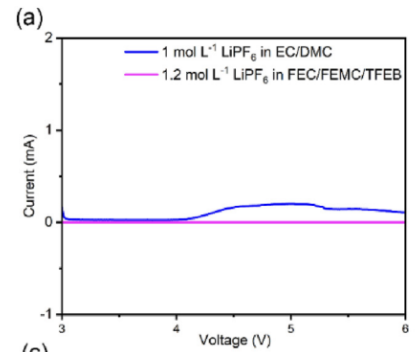

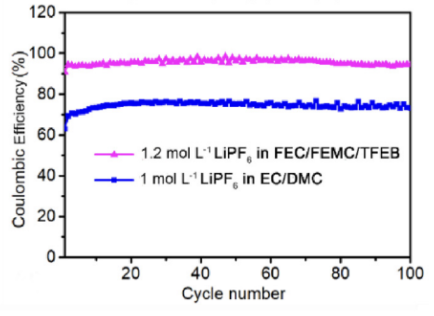

In [31]:
plt1 = PIL.Image.open('/Users/orm/Downloads/1.png')
display(plt1)
plt5 = PIL.Image.open('/Users/orm/Downloads/5.png')
display(plt5)

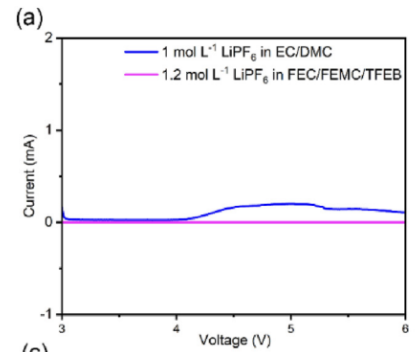

'i=0'

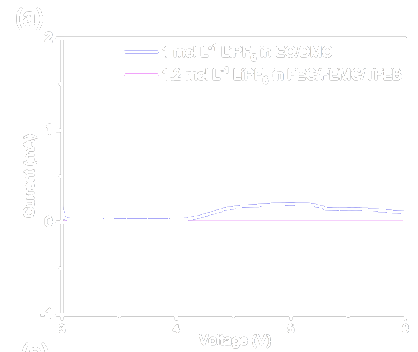

'i=1'

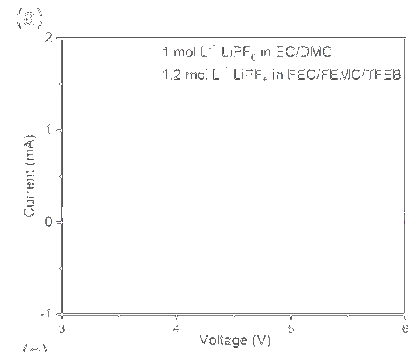

'i=2'

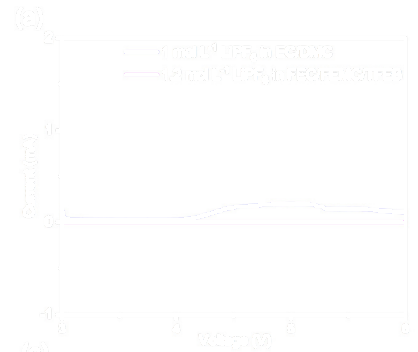

'i=3'

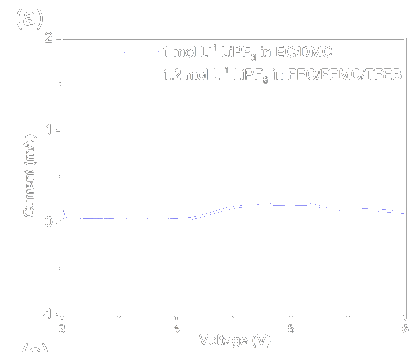

'i=4'

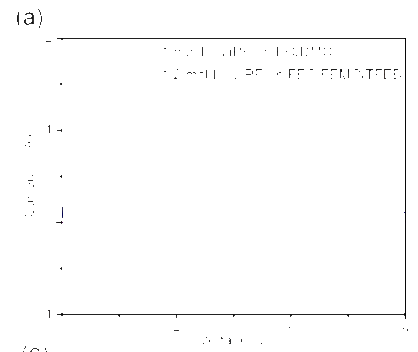

'i=5'

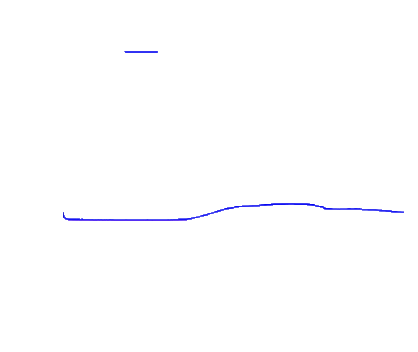

'i=6'

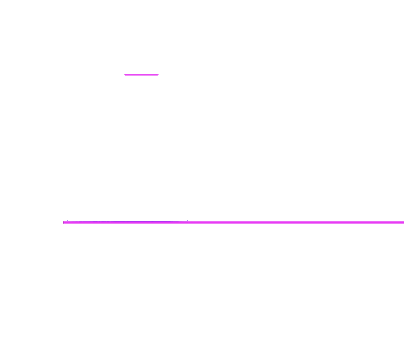

'------'

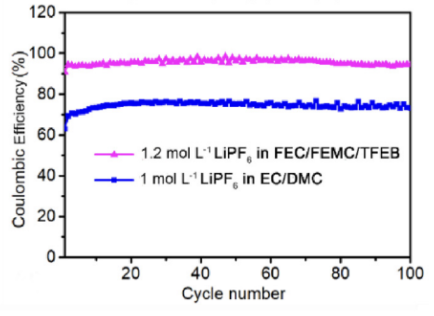

'i=0'

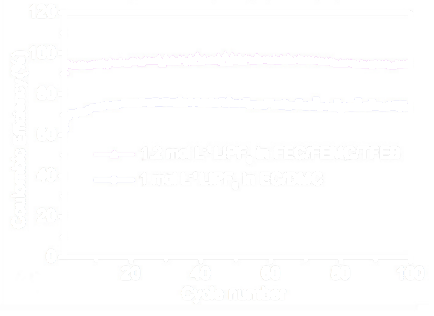

'i=1'

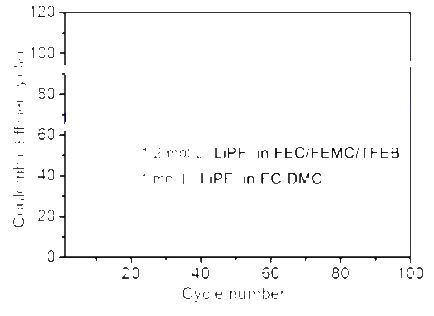

'i=2'

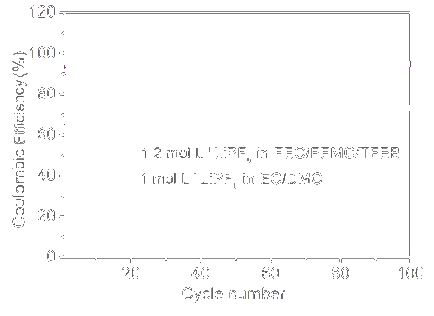

'i=3'

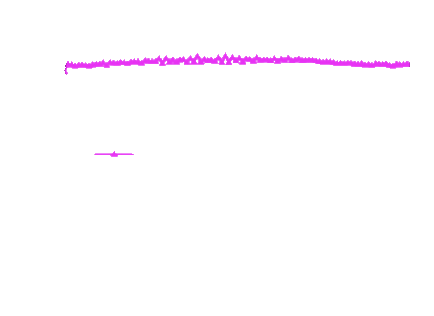

'i=4'

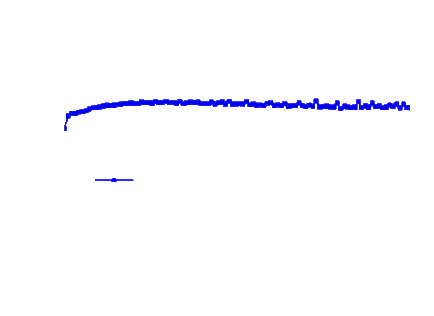

'i=5'

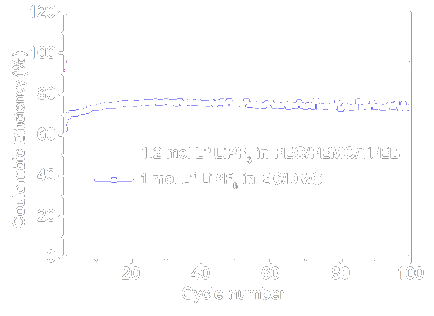

'i=6'

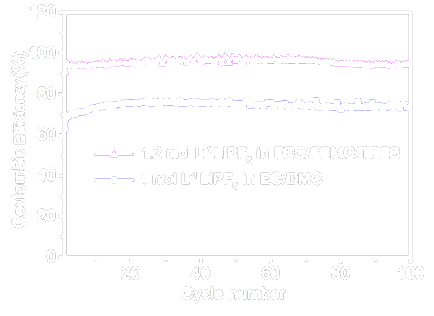

'------'

In [35]:
# number of colors ~= 4 (2 series +  black and white)
## had to add a few more so that colors are separated (differences between grays seem to be larger)

for im in [plt1, plt5]:
    display(im)
    arr_rgb = np.array(im.convert('RGB'))
    kmeans_mask = kmeans_segment(arr_rgb, n_clusters=7)
    display_map(im, kmeans_mask, start_at_zero=False)
    display('------')

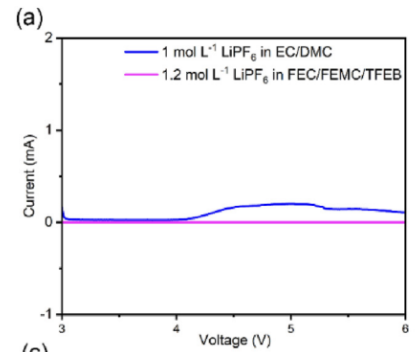

'i=0'

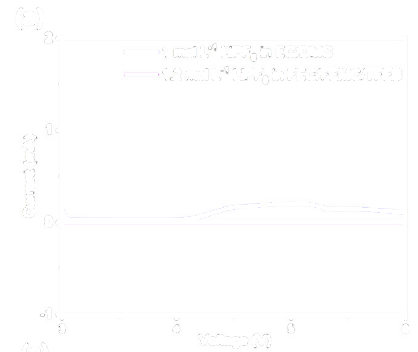

'i=1'

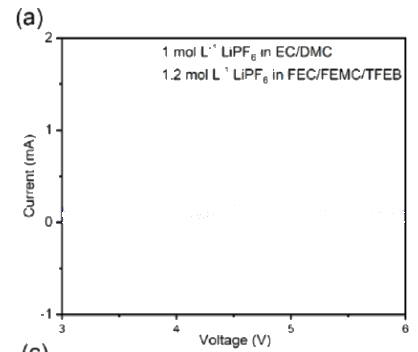

'i=2'

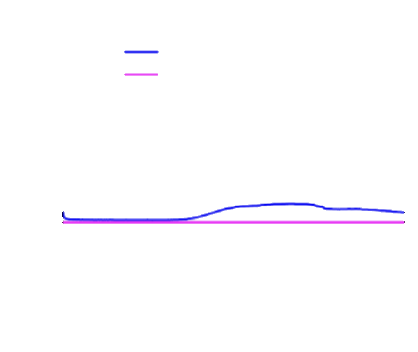

'----'

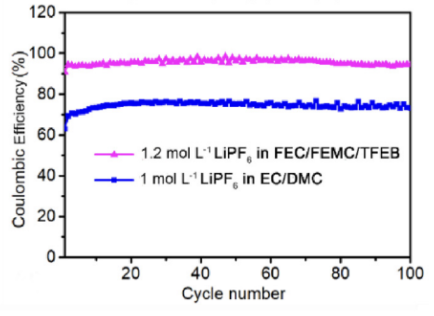

'i=0'

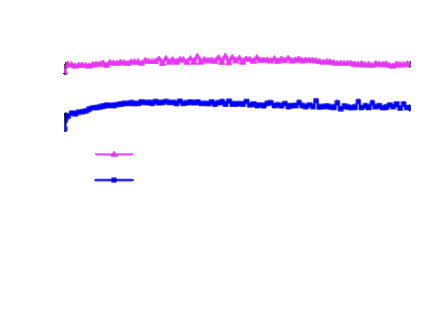

'i=1'

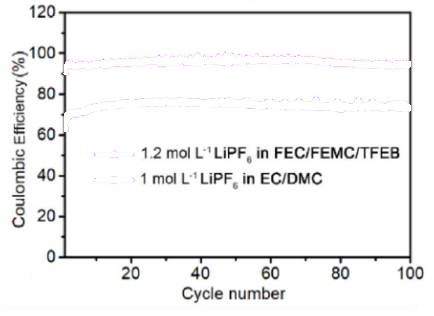

'----'

In [38]:
# maskSLIC result. 
# SLIC is a segmentation algo that also does kmeans on color + xy space.
# xy space seems lies important here.
for im in [plt1, plt5]:
    arr_rgb = np.array(im.convert('RGB'))
    display(im)
    mask_slic = skimage.segmentation.slic(arr_rgb, 
                                  sigma=1., 
                                  n_segments=7,
                                  enforce_connectivity=False,
                                  compactness=.0000001,
                                  mask=None, 
                                  start_label=0)
    display_map(im, mask_slic)
    display('----')